In [11]:
import numpy as np     #只需要下载numpy库即可
import random
import sys
sys.path.append('..')
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
from GridWorld_v3 import GridWorld_v3

In [27]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

import tqdm
policy=0.2*np.ones((25,5))
gamma=0.99
learning_rate=0.01
value=np.random.randn(25)
action_value=np.random.rand(25,5)

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [28]:
# experience buffer
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:
        experiencePool.add_expericence(exp)

In [19]:
experiencePool.getSize()

10000

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

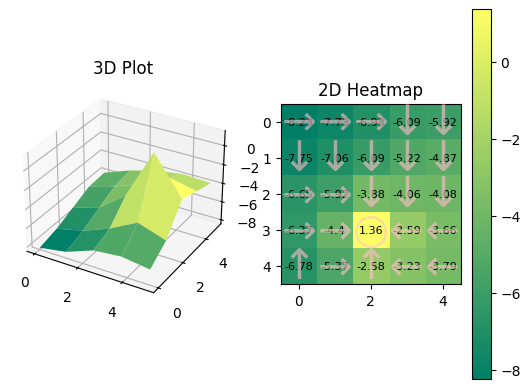

  1%|▊                                                                                 | 1/100 [00:00<00:22,  4.32it/s]

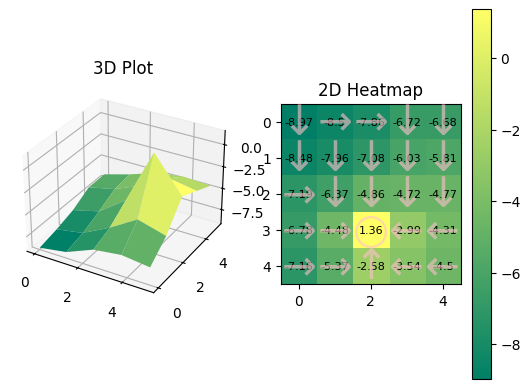

 21%|█████████████████                                                                | 21/100 [00:00<00:01, 64.52it/s]

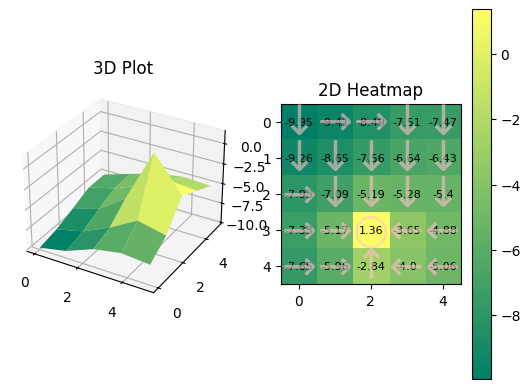

 41%|█████████████████████████████████▏                                               | 41/100 [00:00<00:00, 90.33it/s]

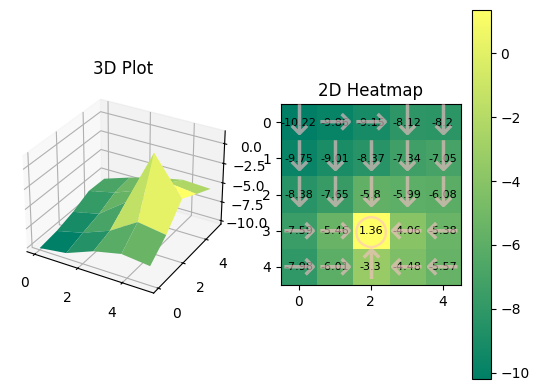

 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:00<00:00, 99.27it/s]

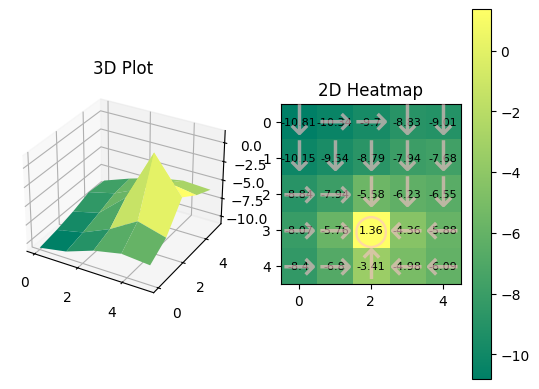

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 105.59it/s]


In [23]:
# Experience_buffer to solve BE state value
batch_size=500
for t in tqdm.tqdm(range(100)):
    exp=experiencePool.sample_exps(batch_size=batch_size)
    # print(len(exp))
    for Trajectory in exp:
        # terminal终止状态
        # print(len(Trajectory))
        tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory
        target=reward+(1-terminal)*gamma*value[next_state]
        TD_error=value[tmp_state]-target
        value[tmp_state]-=learning_rate*TD_error

            

    for i in range(25):
        for j in range(5):
            score,next_state=gridworld.getScore(i,j)
            action_value[i][j]=score+gamma*value[next_state]

    p=np.argmax(action_value,axis=1)
    if t%20==0:
        draw(value.reshape(5,5),p)
            

  0%|                                                                                         | 0/2000 [00:00<?, ?it/s]

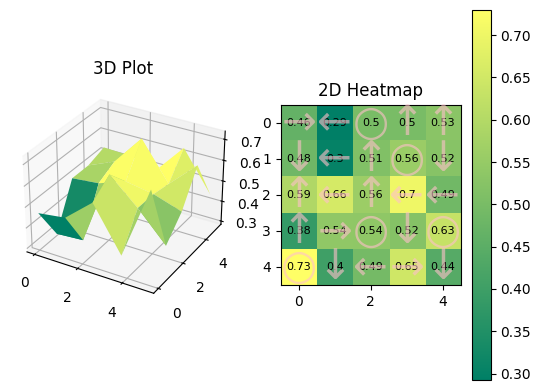

  5%|███▋                                                                           | 93/2000 [00:00<00:05, 366.90it/s]

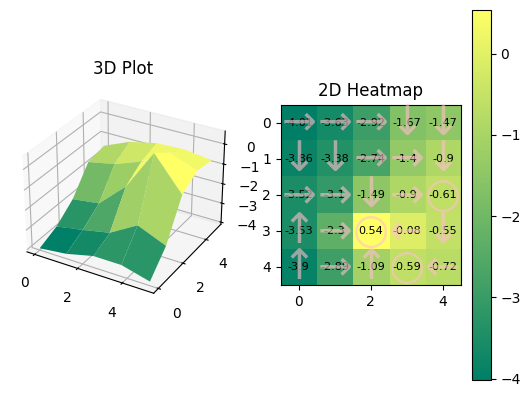

 18%|█████████████▊                                                                | 353/2000 [00:00<00:02, 739.08it/s]

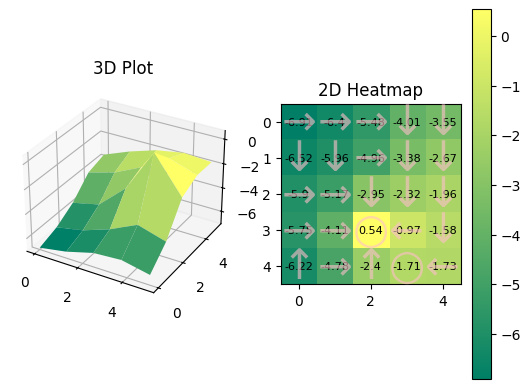

 22%|█████████████████▏                                                            | 441/2000 [00:00<00:02, 598.15it/s]

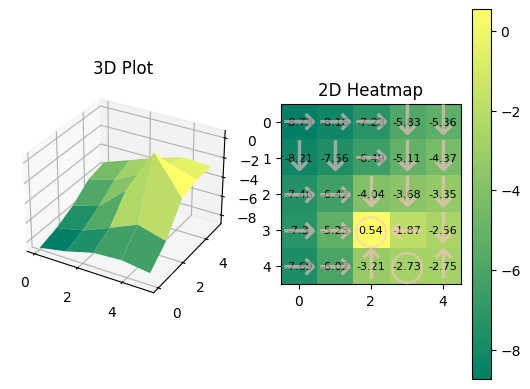

 36%|████████████████████████████▍                                                 | 728/2000 [00:01<00:01, 649.09it/s]

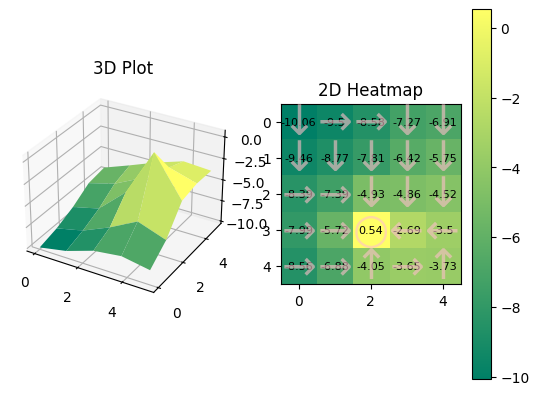

 48%|█████████████████████████████████████▍                                        | 960/2000 [00:01<00:01, 674.40it/s]

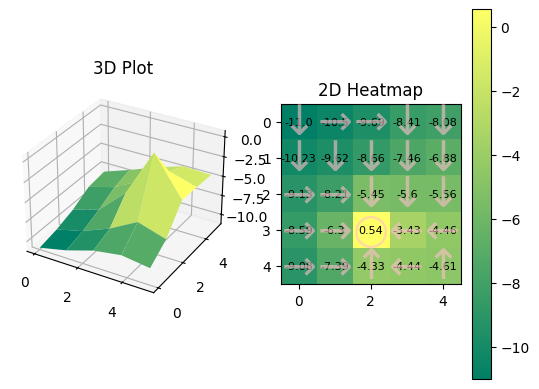

 53%|████████████████████████████████████████▌                                    | 1052/2000 [00:01<00:01, 604.29it/s]

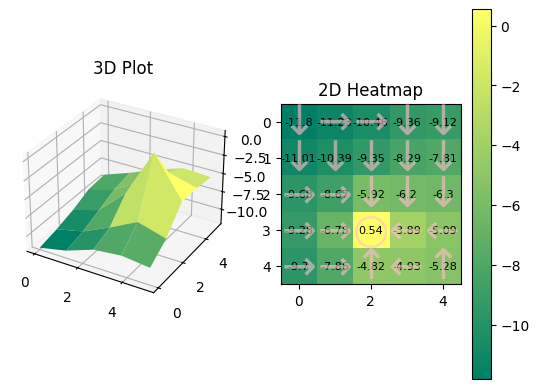

 68%|████████████████████████████████████████████████████▍                        | 1363/2000 [00:02<00:00, 773.89it/s]

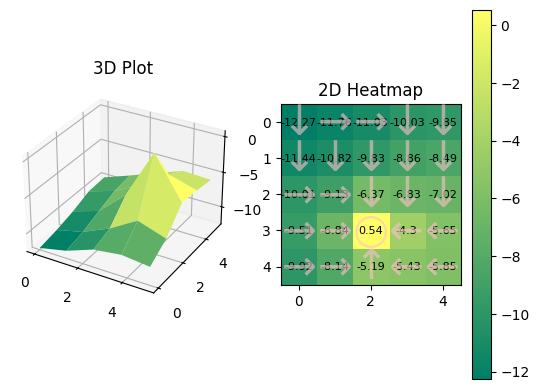

 73%|████████████████████████████████████████████████████████▏                    | 1458/2000 [00:02<00:00, 669.62it/s]

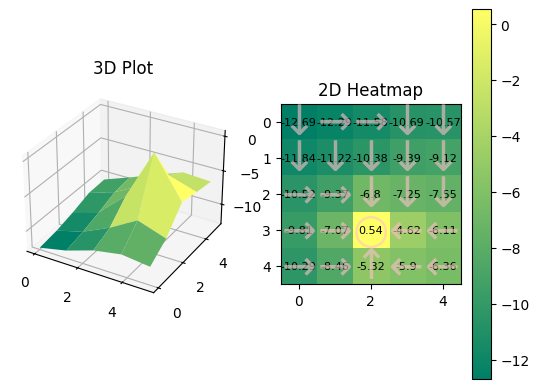

 86%|██████████████████████████████████████████████████████████████████           | 1717/2000 [00:02<00:00, 741.43it/s]

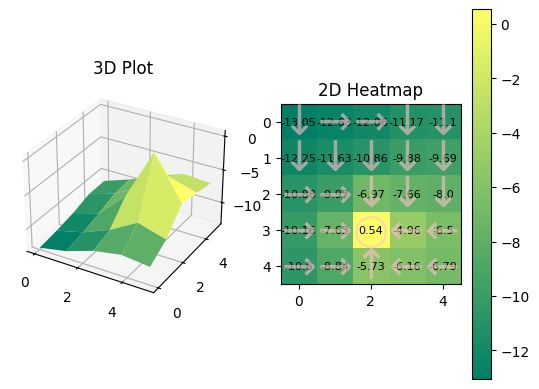

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 648.51it/s]


In [40]:
# Experience_buffer to solve BE action value
batch_size=500
value=np.random.randn(25)
action_value=np.random.rand(25,5)
policy = 0.2 * np.ones((rows*columns,5))
for t in tqdm.tqdm(range(2000)):
    exp=experiencePool.sample_exps(batch_size=batch_size)
    # print(len(exp))
    for Trajectory in exp:
        # terminal终止状态
        # print(len(Trajectory))
        tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory
        target=reward+(1-terminal)*gamma*action_value[next_state][next_action]
        TD_error=action_value[tmp_state][tmp_action]-target
        action_value[tmp_state][tmp_action]-=learning_rate*TD_error

            

    
    if t%200==0:
        p=np.argmax(action_value,axis=1)
        # policy=np.eye(5)[p]
        value=(policy*action_value).sum(axis=1)
        
        draw(value.reshape(5,5),p)
            

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]

🔄⬅️🔄⬅️⬇️
➡️⏫️⏫️⬅️⬅️
➡️⬅️⏬⬇️🔄
🔄⏪✅⏬⬇️
➡️⏩️⬆️🔄🔄


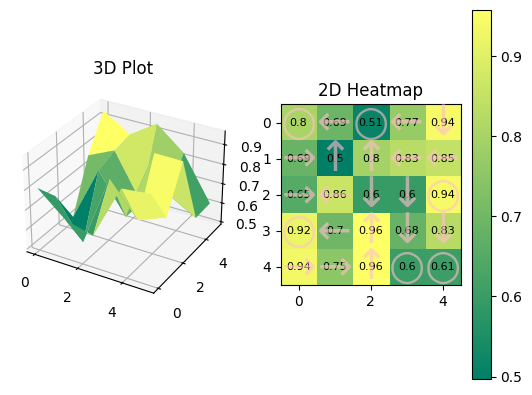

 16%|████████████▍                                                                 | 159/1000 [00:00<00:01, 482.47it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️🔄
⬆️⏩️✅⏪⬆️
🔄⏩️⬆️⬅️⬆️


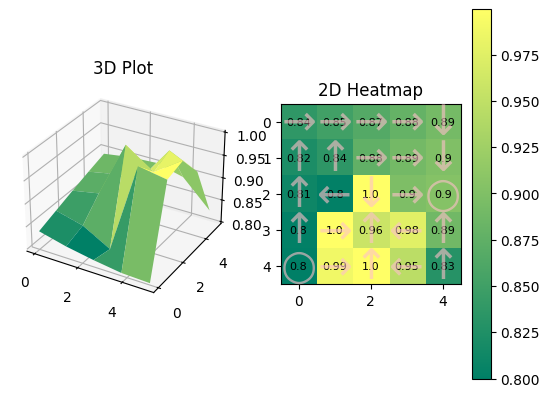

 38%|█████████████████████████████▊                                                | 382/1000 [00:00<00:01, 521.93it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


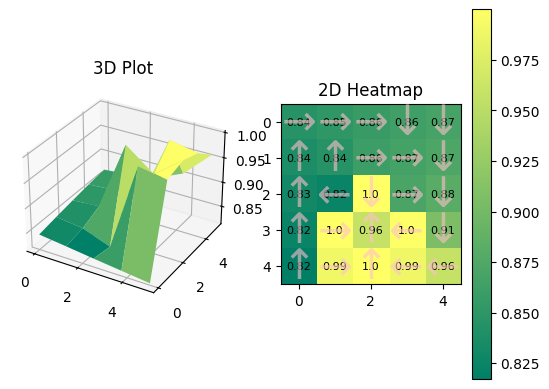

 52%|████████████████████████████████████████▋                                     | 521/1000 [00:01<00:01, 461.29it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


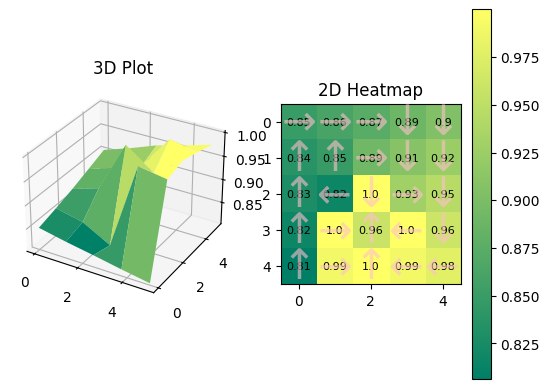

 72%|████████████████████████████████████████████████████████                      | 718/1000 [00:01<00:00, 464.40it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


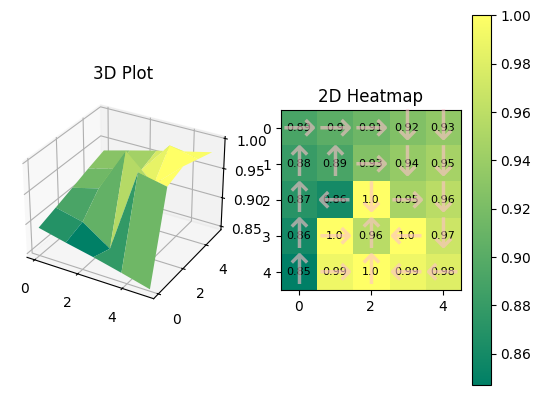

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 430.33it/s]


In [42]:
# Experience_buffer to solve BOE optimal action value
batch_size=500
value=np.random.randn(25)
action_values=np.random.rand(25,5)
policy = 0.2 * np.ones((rows*columns,5))
for t in tqdm.tqdm(range(2000)):
    exp=experiencePool.sample_exps(batch_size=batch_size)
    # print(len(exp))
    for Trajectory in exp:
        # terminal终止状态
        # print(len(Trajectory))
        tmp_state,tmp_action,reward,next_state,next_action,terminal=Trajectory
        target=reward+(1-terminal)*gamma*action_value[next_state].max()
        TD_error=action_value[tmp_state][tmp_action]-target
        action_value[tmp_state][tmp_action]-=learning_rate*TD_error

            

    
    if t%200==0:
        p=np.argmax(action_value,axis=1)
        policy=np.eye(5)[p]
        value=np.argmax(action_value,axis=1)
        
        draw(value.reshape(5,5),p)
            